# Using the MixedMealModel
We will first load the MealModel package, and the Plots package for displaying figures. We also include the SampleData file, that contains a function to load the sample data.

In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/TUe/MealModel`


In [1]:
using MealModel
using Plots
include("../data/SampleData.jl")

SampleData (generic function with 1 method)

We can create the default model easily using this function.

In [2]:
model = MixedMealModel()

MixedMealModel(SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, SciMLSensitivity.ForwardDiffSensitivity{0, nothing}, Tuple{Symbol}, NamedTuple{(:sensealg,), Tuple{SciMLSensitivity.ForwardDiffSensitivity{0, nothing}}}}, SciMLBase.StandardODEProblem}(SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Noth

We can simulate the model by computing the model output.

In [3]:
outputs = output(model)

(time = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0], glucose_gut_to_plasma_flux = [0.0, 0.0070739480832374335, 0.01663854426402624, 0.026289465271634102, 0.03539165287304733, 0.04372897709561377, 0.05125360425148053, 0.057992377495012806, 0.06400407953807853, 0.0693601254336926  …  0.003447329864046612, 0.003412886484452697, 0.00337927287479196, 0.003346645083454641, 0.0033150225010880894, 0.0032842878605967656, 0.003254187237142241, 0.0032243300481431957, 0.0031941890532754228, 0.0031631729298277423], hepatic_glucose_flux = [0.043, 0.04298137818899978, 0.04290914499068729, 0.042777482007844383, 0.04258869773446491, 0.04234805385172427, 0.04206198761062497, 0.041737277318177696, 0.04138061081879172, 0.04099837828846806  …  0.04321439285190515, 0.04321244470277279, 0.04321051286413191, 0.04320859751003788, 0.04320669874977446, 0.043204816627853804, 0.043202951124016446, 0.04320110215323138, 0.043199269565695

We can visualize the resulting outputs with the plot function.

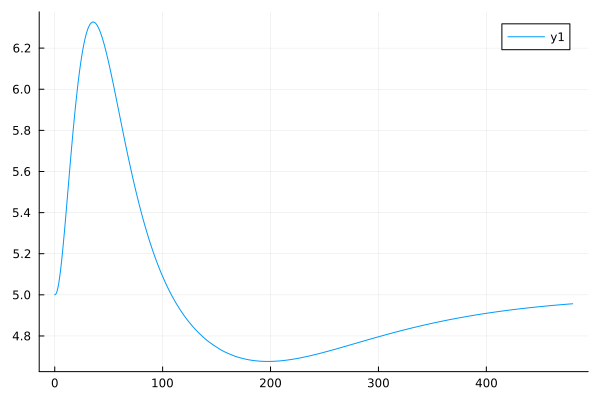

In [4]:
plot(outputs.time, outputs.plasma_glucose)

## Doing Parameter Estimation
For parameter estimation, we will need some more libraries.

In [5]:
using Optimization, OptimizationOptimJL, LineSearches

We can load in the data.

In [6]:
# load in sample data
glc, ins, trg, nfa, bwg, time = SampleData()

([4.97828626648081 9.83226219754181 … 5.00061029702766 4.9062863745201; 4.44438211792684 8.56497936784908 … 4.68440337786608 5.03050899831009; … ; 4.05422828334834 6.68317282007679 … 3.87347487223252 4.14703615153245; 5.09861020045252 7.19169651136166 … 5.1126128190829 4.95616017748044], [21.7542994608033 287.361969174996 … 23.1679411923448 21.8618244436204; 12.5404266739517 124.050624391434 … 13.4555353291966 14.3638940482423; … ; 19.8623112280412 199.253276210798 … 22.5314861118322 21.0737318920216; 108.76002227887 163.060430670949 … 104.745417655491 97.2648413826163], [1.16871366007653 1.5844017833527 … 1.93219870120156 1.72103932334563; 1.12064493587155 0.988185237587493 … 1.74785291292704 1.5803401544383; … ; 0.911568878711074 0.917659723900865 … 1.25922207558199 0.954325323451108; 1.25060974085694 1.17562009272981 … 1.74007908698886 1.9609698046359], [0.335735045292724 0.306808022891325 … 0.504623299086489 0.561199670138616; 0.497614523572355 0.214246896777152 … 0.576852516292241

We will select a single patient from this data of 5 patients.

In [7]:
# select patient
patient_id = 1 # for this sample data, we can select from patients 1-5

glucose_data = glc[patient_id, :]
insulin_data = ins[patient_id, :]
tg_data = trg[patient_id, :]
nefa_data = nfa[patient_id, :];
body_weight = bwg[patient_id];

To incorporate patient specific information, we can create a new model based on the data that we have loaded.

In [8]:
# make a model for this specific patient
model = MixedMealModel(
  subject_body_mass = body_weight,
  fasting_glucose = glucose_data[1],
  fasting_insulin = insulin_data[1],
  fasting_TG = tg_data[1],
  fasting_NEFA = nefa_data[1],
  timespan = (0., 720.)
)

MixedMealModel(ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, SciMLSensitivity.ForwardDiffSensitivity{0, nothing}, Tuple{Symbol}, NamedTuple{(:sensealg,), Tuple{SciMLSensitivity.ForwardDiffSensitivity{0, nothing}}}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}(MealModel.var"#3

We now create a loss function and define out optimizer. We then perform a preselection on the initial latin hypercube samples to obtain the 10% of the best initial values.

In [9]:
loss = make_loss(model, glucose_data, time, insulin_data, time, tg_data, time, nefa_data, time)
optimizer = LBFGS(linesearch = BackTracking(order=3))

# select bounds for the latin hypercube sampler
lhc_lb = [0.005, 0, 0, 0, 0, 60., 0.005, 0]
lhc_ub = [0.05, 1., 10., 1., 1., 720., 0.1, 1.]

# create preselected samples
initial_parameters = perform_preselection(loss, 100, lhc_lb, lhc_ub)

8×10 Matrix{Float64}:
   0.01985    0.03875    0.01715    0.041   …    0.0086    0.00815    0.0284
   0.02       0.83       0.61       0.94         0.31      0.7        0.04
   6.1        2.8        7.2        2.4          1.7       4.6        7.5
   0.05       0.02       0.03       0.01         0.22      0.15       0.25
   0.9        0.74       0.6        0.27         0.98      0.66       0.97
 363.6      720.0      627.6      555.0     …  139.2     528.6      258.0
   0.08765    0.0449     0.0905     0.0373       0.024     0.02495    0.02875
   0.75       0.37       0.32       0.16         0.29      0.26       0.78

Run the optimization for each initial parameter set.

In [10]:
# for each initial parameter set we can easily optimize the model

objectives = []
parameters = []

opt_lb = lhc_lb
opt_ub = lhc_ub

for it in axes(initial_parameters, 2)
  try
    optf = OptimizationFunction((x,p) -> loss(x), Optimization.AutoForwardDiff())
    starting_p = initial_parameters[:, it]
    optprob = OptimizationProblem(optf, starting_p, lb=opt_lb, ub=opt_ub)
    sol = Optimization.solve(optprob, optimizer, x_tol=1e-8, f_tol = 1e-6, g_tol=1e-6)
    push!(parameters, sol.u)
    push!(objectives, sol.objective)
    println("Optimization successful! (E = $(sol.objective)) Moving on...")
  catch e 
    throw(e)
    println("Optimization failed... Resampling...")
  end
end

Optimization successful! (E = 5.752995087041246) Moving on...


Optimization successful! (E = 5.752988302231662) Moving on...


Optimization successful! (E = 5.752995650836897) Moving on...


Optimization successful! (E = 5.7530416748196975) Moving on...


Optimization successful! (E = 5.752989521634671) Moving on...


Optimization successful! (E = 5.753051168411711) Moving on...


Optimization successful! (E = 5.752997169768723) Moving on...


Optimization successful! (E = 5.752996630898965) Moving on...


Optimization successful! (E = 5.7530075844430515) Moving on...


Optimization successful! (E = 5.753040431336287) Moving on...


Combine the resulting parameters into a full parameter vector.

In [11]:
# combine the found parameters with the full model parameters, here we selected the first result out of the 10.
pars = create_full_parameter_vector(model, parameters[1]);

# calculate the model outputs
found_outputs = output(model, pars);

Visualize the result.

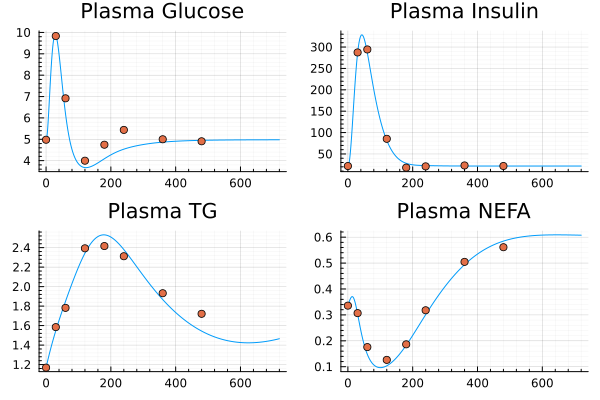

In [12]:
# plot the model fit
glucose_plot = plot(found_outputs.time, found_outputs.plasma_glucose, title="Plasma Glucose")
scatter!(glucose_plot, time, glucose_data)

insulin_plot = plot(found_outputs.time, found_outputs.plasma_insulin, title="Plasma Insulin")
scatter!(insulin_plot, time, insulin_data)

tg_plot = plot(found_outputs.time, found_outputs.plasma_TG, title="Plasma TG")
scatter!(tg_plot, time, tg_data)

nefa_plot = plot(found_outputs.time, found_outputs.plasma_NEFA, title="Plasma NEFA")
scatter!(nefa_plot, time, nefa_data)

plot(glucose_plot, insulin_plot, tg_plot, nefa_plot, legend=false, minorgrid=0.05, grid=0.2)
